In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import join as join
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/osmotic'

In [2]:
def lin(x, a, b) :
    return a*x+b

def fit_coeff(func, x_dat, y_dat) :
    x_dat_log, y_dat_log = x_dat, y_dat
    popt, pcov = curve_fit(func, x_dat_log, y_dat_log)
    return popt#, pcov

def average_powerlaw(a_list, k_list) :
    a_avg = np.average(a_list)
    k_avg = np.exp(np.average(k_list))
    return a_avg, k_avg

def calc_mu(theta) :
    return np.sin(theta)**2 / (2*theta - np.sin(2*theta))

def calc_chi(theta, gamma, kappa, ell0, L0) :
    mu = calc_mu(theta)
    return 0.5*mu*np.sin(theta)*gamma*kappa / (ell0*L0**3)
    #return gamma*kappa / (ell0*L0**3)

def calc_chi(theta, eps, kappa, ell0, L0) :
    mu = calc_mu(theta)
    return 0.5*mu*np.sin(theta)*eps*kappa / (ell0*L0**3)
    #return mu*np.sin(theta)*eps / (L0*ell0**3)


def lin(x, a, b) :
    return a*x+b

def fit_lin(t, N) :
    x, y = np.log(t), np.log(N)
    popt, pcov = curve_fit(lin, x, y)
    alpha, kappa = popt[0], np.exp(popt[1])
    alpha_std, kappa_std = pcov[0, 0], np.exp(pcov[1, 1])
    return kappa, alpha#, kappa_std, alpha_std
    

In [3]:
def plot_osmotic(chis, chiv, path_list, plot_param_list, Nt_list, rescale = False) :
    label = False
    Nt_list[(chis, chiv)] = {}
    for n in range(nsim) :
        Nt_list[(chis, chiv)][n] = np.loadtxt(os.path.join(path_list[(chis, chiv)][n], 'sim_nlum.dat'))
        if label :
            if not rescale :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0], Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], alpha=plot_param_list[(chis, chiv)][4])
            else :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0]*chiv**2, Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], alpha=plot_param_list[(chis, chiv)][4])
        else :
            label = True
            if not rescale :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0], Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], label = r'$\chi_s$ = '+ str(chis) + ' ; $\chi_v = $' + str(chiv), alpha=1.)
            else :
                plt.plot(Nt_list[(chis, chiv)][n][:, 0]*chiv**2, Nt_list[(chis, chiv)][n][:, 1], color=plot_param_list[(chis, chiv)][0], marker=plot_param_list[(chis, chiv)][1], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], label = r'$\chi_s$ = '+ str(chis) + ' ; $\chi_v = $' + str(chiv), alpha=plot_param_list[(chis, chiv)][4])
    return Nt_list[(chis, chiv)]


Import successful !


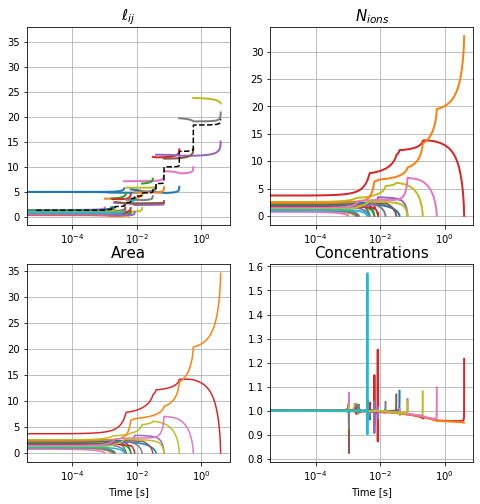

In [4]:
p = '/Users/mathieuleverge/git/chain_lumen/_data/osmotic/N20/out'
L, nions, pos = tools.load_file(os.path.join(p, 'sim_all.dat'))
ell = tools.load_brfile(os.path.join(p, 'sim_bridges.dat'))

savename = ''
show_area = 0
savefig = 0
x_log = 1
tools.plot_evolution(L, nions, ell, savename=savename, show_totalarea=show_area, savefig=savefig, x_logscale=x_log, figsize=(8, 8))


## $N(0) = 100$


In [6]:
ms = 5
lw = 1
alpha=1

plot_param_list = {(5, 5) : ['#780096', '+', ms, lw, alpha], 
                   (50, 5) : ['#FF36B8', '+', ms, lw, alpha], 
                   (500, 5) : ['#FF0700', '+', ms, lw, alpha], 
                   (5, 50) : ['#62FFFF', '+', ms, lw, alpha], 
                   (50, 50) : ['#009BFF', '+', ms, lw, alpha], 
                   (500, 50) : ['#0000FF', '+', ms, lw, alpha], 
                   (5, 500) : ['#D9E34C', '+', ms, lw, alpha], 
                   (50, 500) : ['#63DB00', '+', ms, lw, alpha], 
                   (500, 500) : ['#00B400', '+', ms, lw, alpha]
                   }

In [6]:
subdir = 'N100/'
nsim=5

path_list_N100 = {}

# ========================================================================================
# ===============================  chis = 5.   ===========================================
# ========================================================================================

# chis = 5, chiv = 5
chis = 5
chiv = 5
path_list_N100[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N100[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# chis = 5, chiv = 50
chis = 5
chiv = 50
path_list_N100[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N100[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# chis = 5, chiv = 50
chis = 5
chiv = 500
path_list_N100[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N100[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# ========================================================================================
# ===============================  chis = 50.  ===========================================
# ========================================================================================
    
# chis = 50, chiv = 5
chis = 50
chiv = 5
path_list_N100[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N100[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# chis = 50, chiv = 50
chis = 50
chiv = 50
path_list_N100[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N100[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))

# chis = 50, chiv = 500
chis = 50
chiv = 500
path_list_N100[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N100[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# ========================================================================================
# ===============================  chis = 500.  ==========================================
# ========================================================================================

# chis = 500, chiv = 5
chis = 500
chiv = 5
path_list_N100[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N100[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# chis = 500, chiv = 50
chis = 500
chiv = 50
path_list_N100[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N100[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))

# chis = 500, chiv = 500
chis = 500
chiv = 500
path_list_N100[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N100[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    

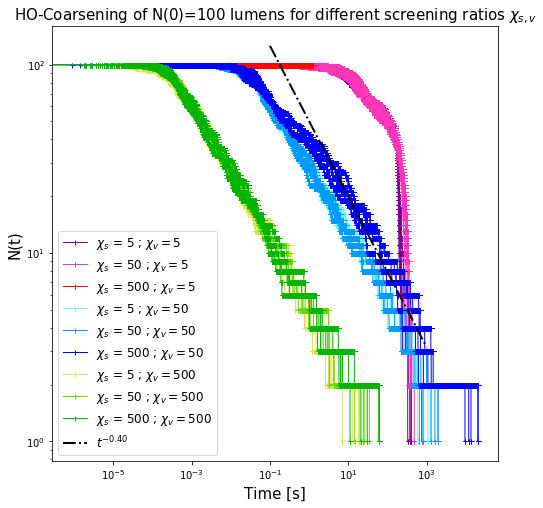

In [7]:
Nt_list_N100 = {}

plt.figure(figsize=(8, 8))


plt.xscale('log')
plt.yscale('log')

# ========================================================================================
# ===============================  chiv = 5.  ============================================
# ========================================================================================

chis5_chiv5 = 1
if chis5_chiv5 :
    chis = 5
    chiv = 5
    Nt_list_N100[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N100, plot_param_list, Nt_list_N100)
    
chis50_chiv5 = 1
if chis50_chiv5 :
    chis = 50
    chiv = 5
    Nt_list_N100[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N100, plot_param_list, Nt_list_N100)
    
chis500_chiv5 = 1
if chis500_chiv5 :
    chis = 500
    chiv = 5
    Nt_list_N100[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N100, plot_param_list, Nt_list_N100)

# ========================================================================================
# ===============================  chiv = 50.  ===========================================
# ========================================================================================

chis5_chiv50 = 1
if chis5_chiv50 :
    chis = 5
    chiv = 50
    Nt_list_N100[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N100, plot_param_list, Nt_list_N100)
    
chis50_chiv50 = 1
if chis50_chiv50 :
    chis = 50
    chiv = 50
    Nt_list_N100[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N100, plot_param_list, Nt_list_N100)
    
chis500_chiv50 = 1
if chis500_chiv50 :
    chis = 500
    chiv = 50
    Nt_list_N100[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N100, plot_param_list, Nt_list_N100)
    
# ========================================================================================
# ===============================  chiv = 500.  ==========================================
# ========================================================================================

chis5_chiv500 = 1
if chis5_chiv500 :
    chis = 5
    chiv = 500
    Nt_list_N100[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N100, plot_param_list, Nt_list_N100)

chis50_chiv500 = 1
if chis50_chiv500 :
    chis = 50
    chiv = 500
    Nt_list_N100[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N100, plot_param_list, Nt_list_N100)

chis500_chiv500 = 1
if chis500_chiv500 :
    chis = 500
    chiv = 500
    Nt_list_N100[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N100, plot_param_list, Nt_list_N100)
    
# ========================================================================================
# ===============================   Power laws  ==========================================
# ========================================================================================

k1, a1 = 500, -1.
t1 = np.logspace(0, 2, 101)
#plt.plot(t1, k1*t1**a1, label = r'$t^{'+"{:2.2f}".format(a1)+'}$', linewidth=2, linestyle='--', color = 'k')

k2, a2 = 50, -2./5.
t2 = np.logspace(-1, 3, 101)
plt.plot(t2, k2*t2**a2, label = r'$t^{'+"{:2.2f}".format(a2)+'}$', linewidth=2, linestyle='-.', color = 'k')

plt.legend(fontsize=12, loc=3)

plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('N(t)', fontsize=15)

plt.title(r'HO-Coarsening of N(0)=100 lumens for different screening ratios $\chi_{s,v}$', fontsize=15)

plt.show()


## N(0) = 1000

In [4]:
subdir = 'N1000/ell10'
nsim=5

path_list_N1000 = {}

# ========================================================================================
# ===============================  chis = 5.   ===========================================
# ========================================================================================

# chis = 5, chiv = 5
chis = 5
chiv = 5
path_list_N1000[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N1000[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# chis = 5, chiv = 50
chis = 5
chiv = 50
path_list_N1000[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N1000[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# chis = 5, chiv = 50
chis = 5
chiv = 500
path_list_N1000[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N1000[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# ========================================================================================
# ===============================  chis = 50.  ===========================================
# ========================================================================================
    
# chis = 50, chiv = 5
chis = 50
chiv = 5
path_list_N1000[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N1000[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# chis = 50, chiv = 50
chis = 50
chiv = 50
path_list_N1000[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N1000[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))

# chis = 50, chiv = 500
chis = 50
chiv = 500
path_list_N1000[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N1000[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# ========================================================================================
# ===============================  chis = 500.  ==========================================
# ========================================================================================

# chis = 500, chiv = 5
chis = 500
chiv = 5
path_list_N1000[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N1000[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# chis = 500, chiv = 50
chis = 500
chiv = 50
path_list_N1000[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N1000[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))

# chis = 500, chiv = 500
chis = 500
chiv = 500
path_list_N1000[(chis, chiv)] = {}
for n in range(nsim) :
    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
    path_list_N1000[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    

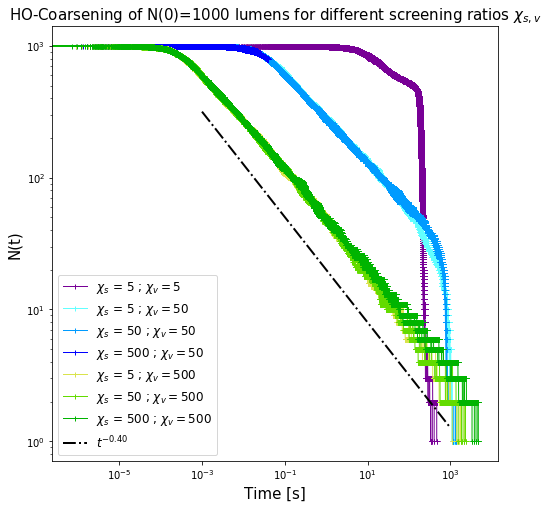

In [12]:
Nt_list_N1000 = {}

plt.figure(figsize=(8, 8))

rescale = False

plt.xscale('log')
plt.yscale('log')

# ========================================================================================
# ===============================  chiv = 5.  ============================================
# ========================================================================================

chis5_chiv5 = 1
if chis5_chiv5 :
    chis = 5
    chiv = 5
    Nt_list_N1000[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale)
    
chis50_chiv5 = 0
if chis50_chiv5 :
    chis = 50
    chiv = 5
    Nt_list_N1000[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale)
    
    
chis500_chiv5 = 0
if chis500_chiv5 :
    chis = 500
    chiv = 5
    Nt_list_N1000[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N100, rescale = rescale)

# ========================================================================================
# ===============================  chiv = 50.  ===========================================
# ========================================================================================

chis5_chiv50 = 1
if chis5_chiv50 :
    chis = 5
    chiv = 50
    Nt_list_N1000[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale)
    
chis50_chiv50 = 1
if chis50_chiv50 :
    chis = 50
    chiv = 50
    Nt_list_N1000[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale)
    
chis500_chiv50 = 1
if chis500_chiv50 :
    chis = 500
    chiv = 50
    Nt_list_N1000[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale)
    
# ========================================================================================
# ===============================  chiv = 500.  ==========================================
# ========================================================================================

chis5_chiv500 = 1
if chis5_chiv500 :
    chis = 5
    chiv = 500
    Nt_list_N1000[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale)

chis50_chiv500 = 1
if chis50_chiv500 :
    chis = 50
    chiv = 500
    Nt_list_N1000[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale)

chis500_chiv500 = 1
if chis500_chiv500 :
    chis = 500
    chiv = 500
    Nt_list_N1000[(chis, chiv)] = plot_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale)
    
# ========================================================================================
# ===============================   Power laws  ==========================================
# ========================================================================================

k1, a1 = 500, -1.
t1 = np.logspace(0, 2, 101)
#plt.plot(t1, k1*t1**a1, label = r'$t^{'+"{:2.2f}".format(a1)+'}$', linewidth=2, linestyle='--', color = 'k')

k2, a2 = 20, -0.4
t2 = np.logspace(-3, 3, 101)
plt.plot(t2, k2*t2**a2, label = r'$t^{'+"{:2.2f}".format(a2)+'}$', linewidth=2, linestyle='-.', color = 'k')

plt.legend(fontsize=12, loc=3)

if rescale :
    plt.xlabel('$t/\tau_v$', fontsize=15)
else :
    plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('N(t)', fontsize=15)

plt.title(r'HO-Coarsening of N(0)=1000 lumens for different screening ratios $\chi_{s,v}$', fontsize=15)

plt.show()



In [10]:
def batch_window(data, wmin, wmax, nwindow) :
    window = np.logspace(wmin, wmax, nwindow)
    time = np.cumsum(window)
    batch = []
    for i in range(len(time)) :
        indices = np.argwhere(np.abs(data[:, 0] - time[i]) <= window[i])[:, 0]
        batch += [data[indices]]
    return batch    

def batch_average(batchlist) :
    B_avg = []
    B_std = []

    for i in range(len(batchlist[0])) :
        Lavg = []
        Lstd = []
        for b in batchlist :
            Lavg += [np.average(b[i], axis=0)]
            Lstd += [np.std(b[i], axis=0)]
    
        tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
        navg = np.nanmean([Lavg[j][1] for j in range(len(Lavg))])
        
        tstd = np.nanstd([Lstd[j][0] for j in range(len(Lstd))])
        nstd = np.nanstd([Lstd[j][1] for j in range(len(Lstd))])
        
        B_avg += [[tavg, navg]]
        B_std += [[tstd, nstd]]
        
    B_avg = np.array(B_avg)
    B_std = np.array(B_std)
    
    return B_avg, B_std

def batch(data_dict, wmin, wmax, nwindow) :
    window = np.logspace(wmin, wmax, nwindow)
    time = np.cumsum(window)
    dat_batch_list = []
    for k in data_dict.keys() :
        dat_batch_list += [batch_window(data_dict[k], wmin=wmin, wmax=wmax, nwindow=nwindow)]
        print(k, end='\r')
    print('End of import !')
    B_avg, B_std = batch_average(dat_batch_list)
    return B_avg, B_std




Import successful !


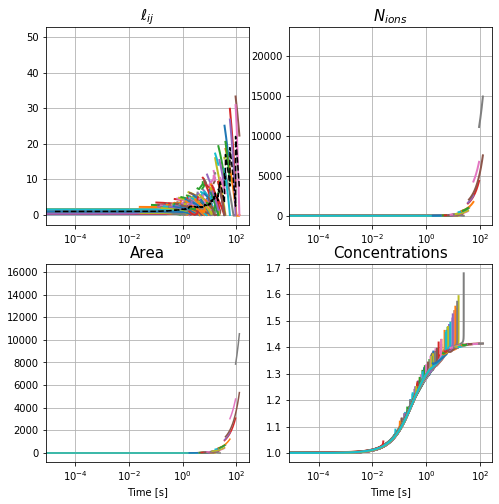

In [14]:
p = '/Users/mathieuleverge/git/chain_lumen/_data/pumping/osmotic/N100/run0000/'
L, nions, pos = tools.load_file(os.path.join(p, 'sim_all.dat'))
ell = tools.load_brfile(os.path.join(p, 'sim_bridges.dat'))

savename = ''
show_area = 0
savefig = 0
x_log = 1
tools.plot_evolution(L, nions, ell, savename=savename, show_totalarea=show_area, savefig=savefig, x_logscale=x_log, figsize=(8, 8))



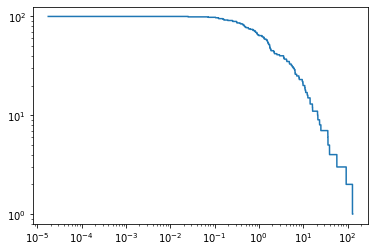

In [13]:
Nt = np.loadtxt(os.path.join(p, 'sim_nlum.dat'))
plt.xscale('log')
plt.yscale('log')
plt.plot(Nt[1:, 0], Nt[1:, 1])